<a href="https://colab.research.google.com/github/engineereliab076/engineereliab076/blob/main/DOG_VS_CAT_CLASSIFIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [21]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [22]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [23]:
from zipfile import ZipFile
dataset = '/content/dogs-vs-cats.zip'

In [24]:
with ZipFile(dataset,'r') as zip:
  zip.extractall
  print('The dataset is extracted')

The dataset is extracted


In [26]:
#extracted the train compressed file
from zipfile import ZipFile
dataset = '/content/train.zip'

In [27]:
with ZipFile(dataset,'r') as zip:
  zip.extractall
  print('The dataset is extracted')

The dataset is extracted


In [29]:
import os
#counting the no of files in train folder
path,dirs,files = next(os.walk('/content/train'))
file_count=len(files)
print('Number of images:',file_count)

Number of images: 25000


Printing the names of the images

In [32]:
file_names=os.listdir('/content/train/')
print(file_names)

['cat.2429.jpg', 'dog.3300.jpg', 'cat.1879.jpg', 'cat.3708.jpg', 'dog.839.jpg', 'dog.4851.jpg', 'cat.786.jpg', 'cat.3161.jpg', 'cat.8620.jpg', 'cat.848.jpg', 'dog.8013.jpg', 'cat.11326.jpg', 'cat.7380.jpg', 'cat.4605.jpg', 'dog.11396.jpg', 'dog.9693.jpg', 'dog.788.jpg', 'cat.7947.jpg', 'dog.8374.jpg', 'cat.7263.jpg', 'dog.4064.jpg', 'dog.8616.jpg', 'cat.4716.jpg', 'cat.9164.jpg', 'cat.12205.jpg', 'dog.6825.jpg', 'cat.12109.jpg', 'cat.5909.jpg', 'dog.2521.jpg', 'dog.5910.jpg', 'dog.6603.jpg', 'dog.6530.jpg', 'cat.3837.jpg', 'dog.2007.jpg', 'dog.362.jpg', 'dog.11322.jpg', 'cat.3777.jpg', 'dog.12461.jpg', 'cat.724.jpg', 'dog.7561.jpg', 'cat.244.jpg', 'cat.10387.jpg', 'dog.4006.jpg', 'cat.873.jpg', 'dog.594.jpg', 'dog.1007.jpg', 'cat.6509.jpg', 'dog.7251.jpg', 'cat.8203.jpg', 'dog.9051.jpg', 'cat.2602.jpg', 'cat.2800.jpg', 'dog.7181.jpg', 'cat.6804.jpg', 'cat.10527.jpg', 'dog.9409.jpg', 'dog.6008.jpg', 'dog.3410.jpg', 'dog.9079.jpg', 'dog.5384.jpg', 'cat.9255.jpg', 'dog.6600.jpg', 'dog.121

importing the dependencies

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

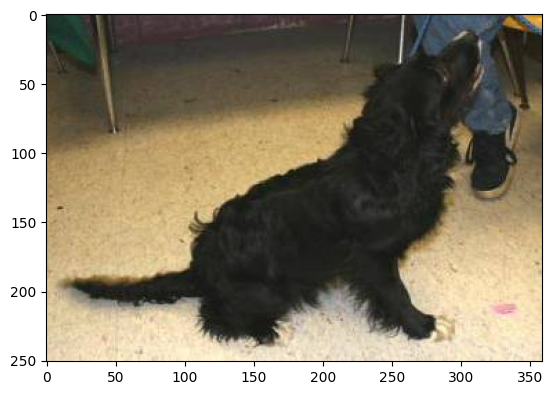

In [35]:
#displaying the dog's image
img = mpimg.imread('/content/train/dog.3300.jpg')
imgplt = plt.imshow(img)
plt.show()

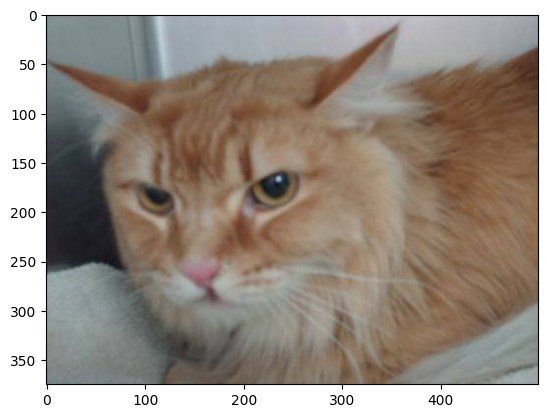

In [36]:
#displaying the cat's image
img = mpimg.imread('/content/train/cat.1879.jpg')
imgplt = plt.imshow(img)
plt.show()

In [38]:
file_names=os.listdir('/content/train/')

for i in range(5):

  names = file_name[i]
  print(name[0:3])

dog
dog
dog
dog
dog


In [40]:
file_names=os.listdir('/content/train/')
dog_count=0
cat_count=0

for img_file in file_names:


  name = img_file[0:3]

  if name == 'dog':
    dog_count+=1
  else:
    cat_count+=1


print('Number of dog images',dog_count)
print('Number of cat images',cat_count)

Number of dog images 12500
Number of cat images 12500


Resizing all the images

In [42]:
#create a directory for resized images
os.mkdir('/content/image resized')

In [43]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newimgpath = resized_folder+filename
  img.save(newimgpath)

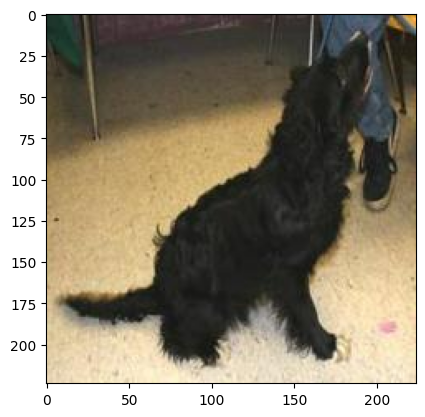

In [44]:
#displaying the dog's resized image
img = mpimg.imread('/content/image resized/dog.3300.jpg')
imgplt = plt.imshow(img)
plt.show()

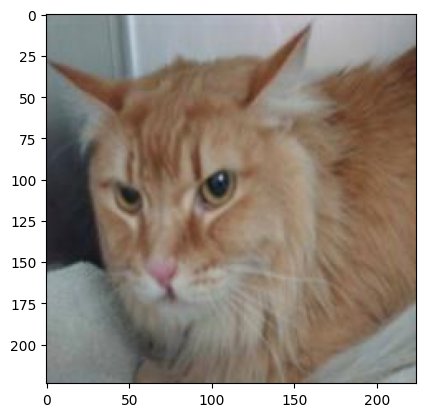

In [45]:
#displaying the cat's resized image
img = mpimg.imread('/content/image resized/cat.1879.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating labels for resized images.

cat---0
dogs---1

In [49]:
#creating a for loop to assign labels

filenames=os.listdir('/content/image resized/')

labels=[]

for i in range(2000):

  file_name = filenames[i]
  label=file_name[0:3]

  if label=='dog':
    labels.append(1)
  else:
    labels.append(0)


In [52]:
print(filenames[0:5])
print(len(filenames))

['cat.2429.jpg', 'dog.3300.jpg', 'cat.1879.jpg', 'cat.3708.jpg', 'dog.839.jpg']
2000


In [53]:
print(labels[0:5])
print(len(labels))

[0, 1, 0, 0, 1]
2000


In [54]:
#counting the images of dogs and cats in the resized folder
values,counts = np.unique(labels, return_counts=True)
print(values,counts)

[0 1] [1024  976]


Converting the images to numpy array

In [55]:
import cv2
import glob

In [62]:
img_directory = '/content/image resized/'
img_extension = ('png','jpg')

files=[]

[files.extend(glob.glob(img_directory + '*.'+ e)) for e in img_extension]
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [63]:
print(dog_cat_images)

[[[[ 38  38  44]
   [ 46  46  52]
   [ 55  55  61]
   ...
   [  3   3   9]
   [  2   2   8]
   [  2   2   8]]

  [[ 39  39  45]
   [ 49  49  55]
   [ 58  58  64]
   ...
   [  5   5  11]
   [  4   4  10]
   [  3   3   9]]

  [[ 43  43  49]
   [ 54  54  60]
   [ 63  63  69]
   ...
   [  6   6  12]
   [  6   6  12]
   [  6   6  12]]

  ...

  [[  0   0   6]
   [  0   1   5]
   [  1   1   7]
   ...
   [116 111 108]
   [115 108 105]
   [113 106 103]]

  [[  0   0   4]
   [  0   2   3]
   [  2   1   5]
   ...
   [114 111 107]
   [112 107 106]
   [109 104 103]]

  [[  0   1   2]
   [  0   1   2]
   [  2   1   3]
   ...
   [115 112 108]
   [113 108 107]
   [111 106 105]]]


 [[[ 41  51  28]
   [ 42  52  29]
   [ 43  53  30]
   ...
   [ 27 127 182]
   [ 20 125 174]
   [ 19 128 172]]

  [[ 41  51  28]
   [ 42  52  29]
   [ 43  53  30]
   ...
   [ 43 146 203]
   [ 40 144 197]
   [ 28 135 186]]

  [[ 41  51  28]
   [ 42  52  29]
   [ 43  53  30]
   ...
   [ 57 164 225]
   [ 66 169 232]
   [ 61 161

In [64]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [65]:
#split labels and  features
x = dog_cat_images
y = np.asarray(labels)

Train test split

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y ,random_state=2)

In [74]:
print(x.shape,x_train.shape,x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [76]:
#SCALE THE DATA
x_train_scale = x_train/255
x_test_scale = x_test/255


In [77]:
print(x_test_scale)
print(x_train_scale)

[[[[0.45490196 0.43137255 0.38823529]
   [0.56078431 0.5372549  0.49411765]
   [0.61568627 0.58039216 0.54117647]
   ...
   [0.36862745 0.31764706 0.3254902 ]
   [0.43137255 0.38039216 0.38823529]
   [0.39607843 0.34509804 0.35294118]]

  [[0.57254902 0.54901961 0.50588235]
   [0.62745098 0.60392157 0.56078431]
   [0.59607843 0.56078431 0.52156863]
   ...
   [0.37647059 0.3254902  0.33333333]
   [0.40392157 0.34901961 0.35686275]
   [0.35686275 0.30588235 0.31372549]]

  [[0.63137255 0.60784314 0.56470588]
   [0.64705882 0.62352941 0.58039216]
   [0.56862745 0.53333333 0.49411765]
   ...
   [0.3254902  0.27058824 0.27843137]
   [0.36078431 0.29411765 0.30588235]
   [0.35686275 0.30196078 0.30980392]]

  ...

  [[0.15686275 0.22745098 0.22352941]
   [0.25882353 0.34117647 0.33333333]
   [0.33333333 0.41960784 0.41176471]
   ...
   [0.29019608 0.36470588 0.37647059]
   [0.23137255 0.31372549 0.31764706]
   [0.16078431 0.24313725 0.24705882]]

  [[0.19215686 0.25490196 0.25098039]
   [0.1

MODEL TRAINING

BUILDING THE NN

In [78]:
import tensorflow as tf
import tensorflow_hub as hub

In [79]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [80]:
number_of_classes = 2
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(number_of_classes),

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [81]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

In [82]:
model.fit(x_train_scale,y_train,epochs=10)

Epoch 1/10
50/50 [==============================] - 60s 1s/step - loss: 0.1683 - accuracy: 0.9369
Epoch 2/10
50/50 [==============================] - 54s 1s/step - loss: 0.0572 - accuracy: 0.9819
Epoch 3/10
50/50 [==============================] - 69s 1s/step - loss: 0.0406 - accuracy: 0.9887
Epoch 4/10
50/50 [==============================] - 51s 1s/step - loss: 0.0319 - accuracy: 0.9937
Epoch 5/10
50/50 [==============================] - 52s 1s/step - loss: 0.0257 - accuracy: 0.9956
Epoch 6/10
50/50 [==============================] - 52s 1s/step - loss: 0.0206 - accuracy: 0.9962
Epoch 7/10
50/50 [==============================] - 52s 1s/step - loss: 0.0179 - accuracy: 0.9981
Epoch 8/10
50/50 [==============================] - 51s 1s/step - loss: 0.0151 - accuracy: 0.9969
Epoch 9/10
50/50 [==============================] - 52s 1s/step - loss: 0.0136 - accuracy: 0.9987
Epoch 10/10
50/50 [==============================] - 50s 996ms/step - loss: 0.0112 - accuracy: 0.9994


In [84]:
#accuracy on test data
score,acc = model.evaluate(x_test_scale,y_test)
print('Test loss',score)
print('Test accuracy=',acc)

13/13 [==============================] - 21s 2s/step - loss: 0.0657 - accuracy: 0.9750
Test loss 0.06567780673503876
Test accuracy= 0.9750000238418579


PREDICTIVE SYSTEM

Path of the image to be predicted/content/CAT4.JPG


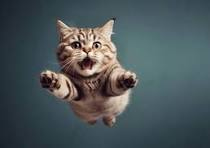

1/1 [==============================] - 0s 50ms/step
[[ 1.7556382 -0.9471432]]
0
THE IMAGE IS A CAT


In [95]:
input_img_path = input('Path of the image to be predicted')

input_img = cv2.imread(input_img_path)

cv2_imshow(input_img)

input_img_resize = cv2.resize(input_img,(224,224))

input_img_scaled = input_img_resize/255

img_reshaped = np.reshape(input_img_scaled,[1,224,224,3])

input_pred = model.predict(img_reshaped)
print(input_pred)

input_pred_label = np.argmax(input_pred)
print(input_pred_label)

if input_pred_label == 0:
  print('THE IMAGE IS A CAT')
else:
  print('THE IMAGE IS A DOG')
